# 07주차_01_Visualization

<h3>Visualization with Matplotlib</h3>

이번 시간에는 python의 시각화에 대해서 배움. python에서 쓸 수 있는 다양한 시각화 툴이 있지만, 가장 기본적이고 널리 쓰이는 툴임 <br>
2002년 John Hunter가 IPython command line에서 MATKAB의 시각화 기능을 구현하기 위해 만들었음. 초기 버전은 gnuplot의 wrapper로 시작했는데 지금은 자체적인 기능을 구현해 독립적으로 작동함 <br>
Matplotlib은 많은 운영체제와 그래픽 백엔드에서 대부분 잘 작동함, 즉 호환성이 좋음

<h3>Importing Matplotlib</h3>
numpy를 np, pandas를 pd로 줄여 부르는 것 처럼 보통 Matplotlib는 2가지 단축어를 사용 <br>
plt는 mathplotlib에서 가장 많이 쓰이는 interface

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<h3>Setting Styles</h3>
plt.style을 활용하면 기본적인 그래프의 스타일을 고를 수 있음 <br>
아래와 같이 classic 스타일을 고르면 classic Matplotlib style의 그림을 그릴 수 있음 <br>
matplotlib 1.5 이상에서만 작동함

In [2]:
plt.style.use('classic')

show() or No show()? How to Display Your Plots <br>
Matplotlib을 가장 잘 사용하는 방법은 환경에 따라 다름 <br>
Python Script, IPython 터미널, IPython 노트북의 세가지(+기타 wrapper) 케이스

<h3>Plotting from a script</h3>
Python Script에서 직접 사용하는 경우에는 plt.show()를 필수적으로 사용해야 함 <br>
plt.show()는 event loop를 시작시키고 현재 그리고 있ㄴ는 figure object들을 볼 수 있는 interactive window를 열어줌 <br>
스크립트를 commeand line에서 실행시킴 <br>
이 때 열리는 interactive window는 사용하는 시스템의 grahpical backend에 따라 달라짐 <br>
plt.show()는 한 session 당 한 번만 사용하는게 좋음. 실행이 중첩되는 경우 backedn에 따라 문제가 발생할 수 있음

<h3>Plotting from an IPython shell</h3>
IPthon shell에서도 Matplotlib을 사용할 수 있음. IPython은 Matplotlib을 작동하기 위해서 %maplotlib magic command가 있음 <br>
이렇게 된다면 plt는 새로운 figure window를 생성하고 새로운 커맨드를 받을 때마다 그림을 업데이트 해 줌 <br>
때때로 업데이트가 안 되는 경우 plt.draw()를 통해 그림을 다시 그려주면 되고, show를 꼭 사용하지 않아도 됨

<h3>Plotting from an IPython notebook (jupyter notebook)</h3>
celll마다 출력 화면에 실행이 종료된 코드에 해당하는 그림을 실행시킴 <br>
2가지 magic command가 존재함<br>
<li>%matplotlib notebook은 interactive plot을 그려줌
<li>%matplotlib inline은 랜더링된 static images를 그려줌 <br>
강의에서는 주로 %matplotlib inline을 사용함 <br>
    한 번만 커맨드를 실행시켜주면, 동일 세션과 커널에 작동하는 모든 cell들은 이 커맨드의 영향을 받고, png 이미지로 그림을 그려줌

In [3]:
%matplotlib inline

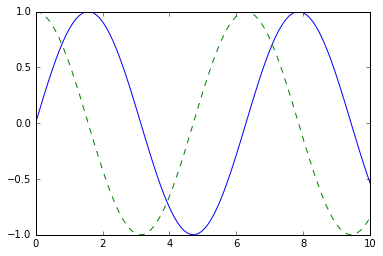

In [5]:
import numpy as np
x = np.linspace(0,10,100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

<h3>Saving Figures to File</h3>
savefig() command를 통해서 그림을 파일로 저장할 수 있음 <br>
matplotlib은 파일의 확장자를 통해 자동으로 출력된 파일의 형식을 인식해줌

In [6]:
fig.savefig('my_figure.png')

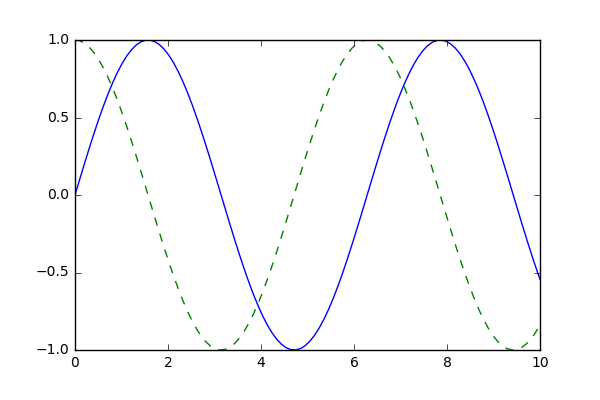

In [10]:
from IPython.display import Image
Image('my_figure.png')

동일한 그림이 잘 출력된 것을 확인할 수 있음 <br>
그릴 수 있는 파일의 형식은 아래와 같으며, 버전과 시스템에 따라 조금씩 차이남 <br>
ps, eps, pdf, svg 등은 벡터 이미지로 출력되고, tif, png등은 비트맵 이미지로 저장됨

<h2>Two Interfaces for the Price of One</h2>
matplotlib의 두 가지 interface <br>
<li> MATLAB style
<li> Object oriented

<h3>MATLAB-style Interface</h3>
MATplotlibdms MATLAB을 Python으로 대체하기 위해 만들어짐

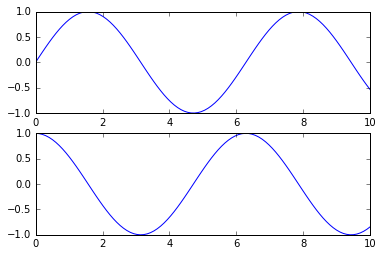

In [12]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(x, np.sin(x))

plt.subplot(2,1,2)
plt.plot(x, np.cos(x))
plt.show()

이 방식은 현재의 figure와 axes를 기억하고 있음. 그 특정 위치를 변경하는 방식임 <br>
plt.gcf() (get current figure) and plt.gca() (get current axis) 두 가지를 통해 plt가 현재 다루고 있는 figure와 axes를 확인할 수 있음 <br>
이 인터페이스는 편하지만 단점이 있음 <br>
2번쨰 패널을 만든 이후에 첫번째 패널을 다시 수정하려면 처음부터 전체의 과정을 다시 수행해야 함

<h3>Object-oriented interface</h3>
Matplotlib은 객체지향 프로그래밍처럼 figure와 axes를 객체로 사용하는 Object-oriented interface를 지원함 <br>
즉, 현재 바꾸고 싶은 위치를 직접 지정해서 그 객체의 멤버 함수와 멤버 변수를 통해서 그림을 조정하는 것이 가능함 <br>
Figure, Axes 2가지의 object가 있음

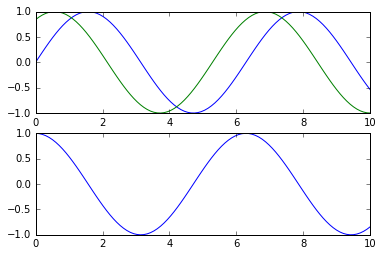

In [16]:
fig, ax = plt.subplots(2)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
ax[0].plot(x, np.sin(x + 1))
plt.show()

대부분의 간단한 경우 plt.plot()을 ax.plot()으로 바꾸는 정도로 대부분의 기능이 두 가지 경우에 모두 수행 가능함 <br>
복잡한 그림일수록 object oriented가 훨씬 효울적임

<h3>Simple Line Plots</h3>
모든 그래프 중 가장 기본적인 그래프는 y = f(x) 형태의 함수

In [19]:
plt.style.use('seaborn-whitegrid')

Matplotlib의 pyplot은 figure와 axes로 구성되어 있음 <br>
가장 단순하게 1개 figure와 1개 axes로 구성해서 만들어봄 

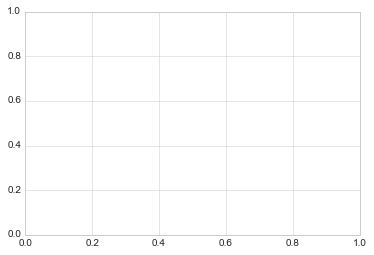

In [20]:
fig = plt.figure()
ax = plt.axes()

plt.figure는 axes, text, label 그리고 기타 graphic들을 모두 포괄하는 한 개의 큰 컨테이너 <br>
plt.axes는 저 위에 그래프의 tick, label 실제 시각화된 그래프의 element들을 모아놓은 object <br>
figure instance는 주로 fig라는 변수명을 쓰고, axes instance는 주로 ax라는 변수명을 사용함 <br>
일단 axes를 만들면 ax.plot을 통해서 그래프를 그릴 수 있음

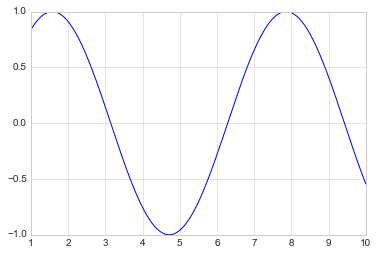

In [22]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1,10,1000)
ax.plot(x, np.sin(x))

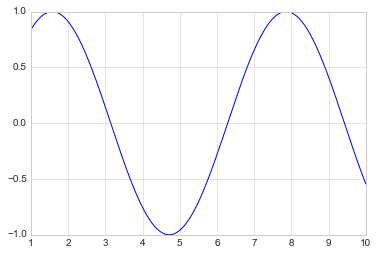

In [23]:
plt.plot(x, np.sin(x))

plot을 여러 번 실행하면 별도의 명령어가 없다면 axes에 추가적인 선을 그려줌

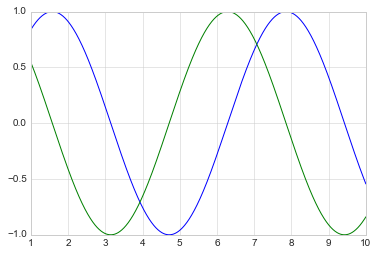

In [24]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

<h3>Adjusting the Plot : Line Colors and Styles</h3>
그래프의 색을 원하는 대로 바꾸거나, 선의 스타일을 바꾸고 싶을 때 <br>
plt.plot()의 옵션을 변경할 수 있음 <br>
색상의 경우 color parameter를 선언해줌 <br>
컬러가 지정되지 않으면 현재 지정된 스타일에 맞추어 자동으로 색상을 지정해줌 <br>
보통 10개 내외의 색상이 스타일마다 지정되어 있어 동일한 색이 겹칠 수 있음

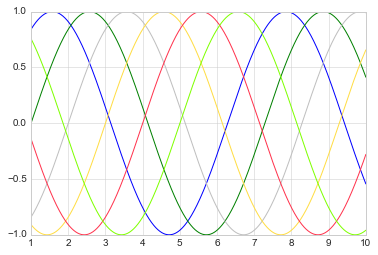

In [28]:
plt.plot(x, np.sin(x - 0), color = "blue")
plt.plot(x, np.sin(x - 1), color = "g")
plt.plot(x, np.sin(x - 2), color = "0.75")
plt.plot(x, np.sin(x - 3), color = "#FFDD44")
plt.plot(x, np.sin(x - 4), color = (1.0,0.2,0.3))
plt.plot(x, np.sin(x - 5), color = "chartreuse")

linestyle 파라미터를 통해서 선 스타일을 바꿀 수 있음

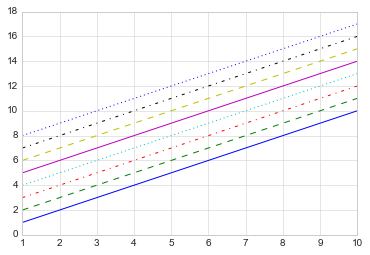

In [30]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

line style과 color를 합쳐서 한 번에 파라미터로 입력이 가능함, 키워드 없이 아래처럼 입력 <br>
복잡한 색상 지정이 불가함 -> rgbcymk만 가능

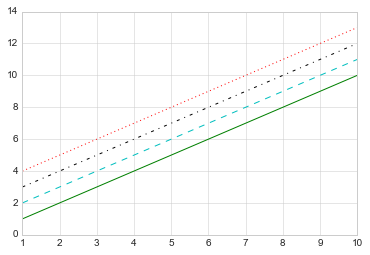

In [33]:
plt.plot(x, x + 0, '-g')
plt.plot(x, x + 1, '--c')
plt.plot(x, x + 2, '-.k')
plt.plot(x, x + 3, ':r')

<h3>Adjusting the Plot : Axes Limit</h3>
x축과 y축의 범위를 조정하고 싶다면 plt.xlim()과 plt.ylim() 함수를 사용

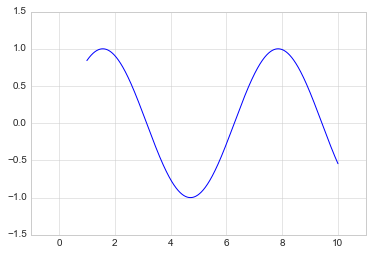

In [35]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

x축이나 y축을 뒤집어서 큰 수부터 쓰고 싶을 때는 parameter를 큰수 작은수 순서로 써줌

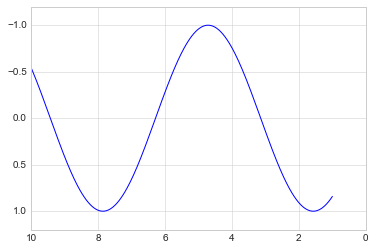

In [36]:
plt.plot(x, np.sin(x))
plt.xlim(10,0)
plt.ylim(1.2, -1.2);

plt.axis()함수도 존재함, axes와 다름 <br>
plt.axis()함수는 한 번에 x와 y의 범위를 [xmin, xmax, ymin, ymax] 형태로 지정할 수 있음

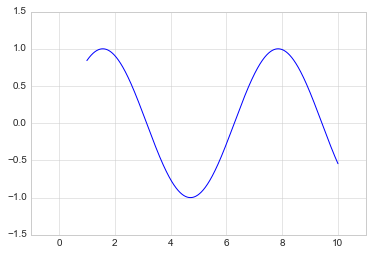

In [38]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

plt. axis() 함수는 데이터 값에 따라서 어떤 식으로 축을 조정할지 방식을 지정해줄 수도 있음

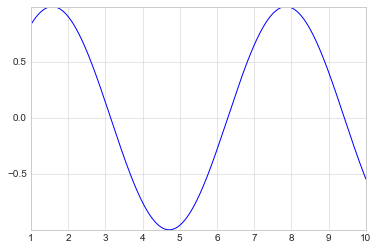

In [39]:
plt.plot(x, np.sin(x))

plt.axis('tight');

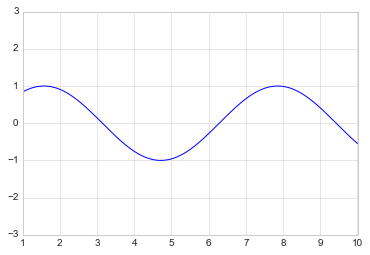

In [40]:
# x축과 y축의 1단위를 같은 길이로 만들어 주는 옵션도 가능함
plt.plot(x, np.sin(x))
plt.axis('equal');

<h3>Labeling Plots</h3>
그림에 제목을 붙이거나, 아니면 축에 레이블을 붙이고 싶거나, 범례를 쓰는 법 <br>
한 그래프에 여러개의 선이 있다면 범례로 구분함 -> plt.legend <br>
개개별의 plot 이름은 Plot시점에서 label을 지정해줌


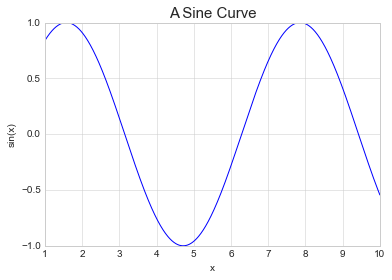

In [43]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve", size = 15)
plt.xlabel("x")
plt.ylabel("sin(x)");

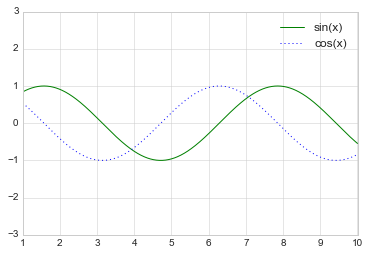

In [46]:
plt.plot(x, np.sin(x), '-g', label = 'sin(x)')
plt.plot(x, np.cos(x), ':b', label = 'cos(x)')
plt.axis('equal')
plt.legend();
# plot에서 지정한 line style과 color도 같이 보여줌으로서 선이 어떤 역할을 하는지 구분지어 줄 수 있음

<h3>Object oriented way</h3>
plt의 대부분 함수는 ax의 object oriented 방식으로 그대로 쓸 수 있음 <br>
예를 들어 plt.plot() = ax.plot()나 plt.legend = ax.legend는 동일한 것임 <br>
아래 함수들은 다른 형태를 가짐 <br>
<li> plt.xlabel() -> ax.set_xlabel()
<li> plt.ylabel() -> ax.set_ylabel()
<li> plt.xlim() -> ax.set_xlim()
<li> plt.ylim() -> ax.set_ylim()
    <li> plt.title() -> ax.set_title() <br>
ax.set()함수를 통해 다양한 것을 한 번에 지정할 수도 있음

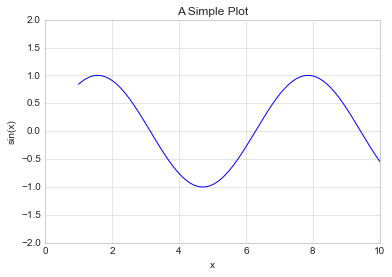

In [48]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='sin(x)', title='A Simple Plot');

<h2>Simple Scatter Plots</h2>
실제 점 사이에 선으로 이어주지 않고 원래의 데이터 포인트를 그대로 표시해줌 <br>
<h3>Scatter Plots with plt.plot</h3>
plt.plot / ax.plot은 아무런 옵션이 없으면 기본적으로 line plot을 그려주지만 옵션을 통해 scatter plot을 그릴 수 있음

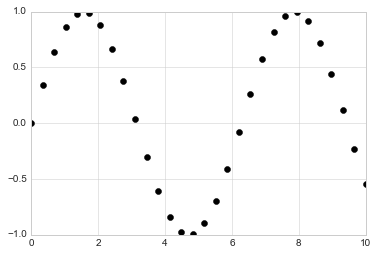

In [50]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color = 'black')

3번째 옵션은 marker의 형태로 나타내 주는 character임 <br>
line style을 지정해 줄 때 처럼, string code를 통해서 다양한 marker의 종류를 설정해 줄 수 있음

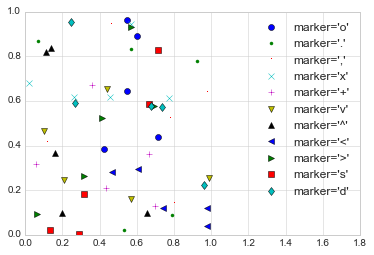

In [51]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

line code와 color code를 같이 넣어주면, marker와 line이 모두 있는 그림을 그릴 수 있음

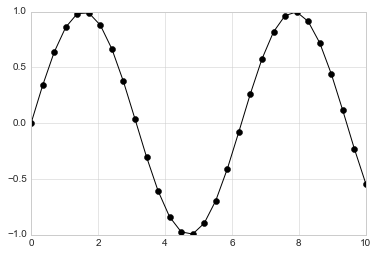

In [52]:
plt.plot(x, y, '-ok')

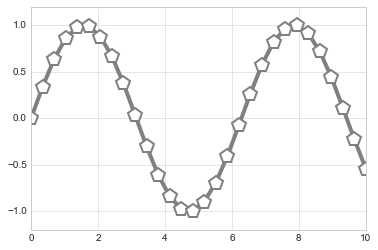

In [53]:
plt.plot(x, y, '-p', color='gray', markersize=15, linewidth=4, 
         markerfacecolor='white', markeredgecolor='gray', markeredgewidth=2)
plt.ylim(-1.2, 1.2);

<h3>Scatter Plots with plt.scatter</h3>
plt.scatter function <br>
plt.scatter : 개개의 점의 크기, 색상 등을 모두 자유롭게 조정할 수 있음 <br>

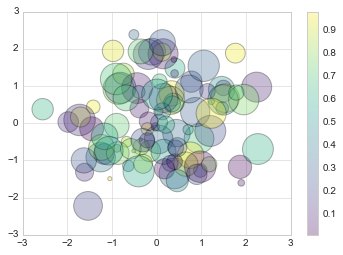

In [54]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale

점의 크기와 색상을 통해 시각화에 더 많은 정보를 담을 수 있음 <br>
예를들어 2차원 이상의 데이터를 2차원 그림으로 그리고 싶을 때 유용함 <br>
iris dataset은 1963년에 Ronald Fisher가 3가지 종류의 iris 꽃들의 꽃받침(sepals)과 꽃잎(petals)각각의 길이, 너비 4개의 feature로 만든 간단한 분류 데이터 <br>
x축과 y축은 꽃받침의 길이와 너비, 그리고 color는 3가지 꽃의 종류, 점의 크기는 꽃잎의 너비으로 둔 시각화

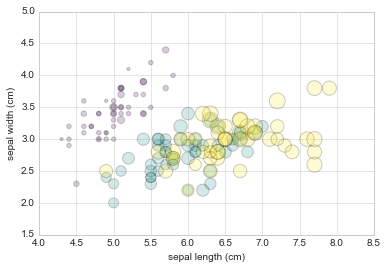

In [55]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

<h3>Plot Versus scatter : A Note on Efficiency</h3>
plt.plot와 plt.scatter의 기능이 다르지만, 데이터가 커진다면 어떤 것이 효율적일까 <br>
위와 같은 복합적인 시각화를 시도하려는 것이 아니라면 일반적으로 plt.plot이 더 효율적임

<h2>Visualizing Errors</h2>
데이터를 다룰 때에는 데이터의 대표값과 함ㅁ께 에러 값을 다루는 것이 중요함 <br>

<h3>Basic Errobars</h3>
간단한 Errorbar는 yerr, xerr 키워드를 사용

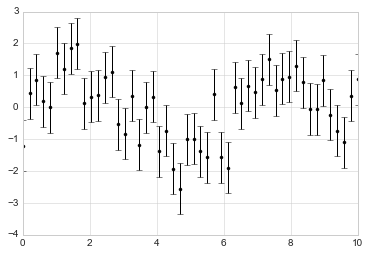

In [57]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

# fmt : 라인과 점을 형태를 조절해주는 키워드
plt.errorbar(x, y, yerr=dy, fmt='.k');

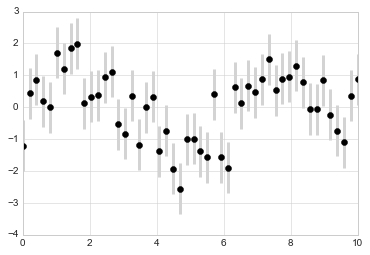

In [58]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

<h3>Continouous Erros</h3>
연속함수 그래프의 경우 에러의 경우도 분포에 따른 quantile등으로 주어지는 경우가 많음 <br>
예를 들어서 중간값, 상위 25%, 하위 25%을 한 번에 표현하는 것 <br>
errorbar를 그리는 것보다 plt.plot과 plt.fill_between을 합치는 것이 더 유용한 결과를 내줌 <br>
Gaussian Process Regressor는 확률론적 예측을 통해서 데이터를 회귀분석해줌 <br>
그리고 각 위치에 대해서 실제 데이터와 에러값을 errorbar로 그릴 수 있음

In [59]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x) # lamdba 함수는 배워두면 편리합니다. 입력되는 x 변수에 대해서 값을 계산해준다고 생각해주시면 됩니다.
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)
# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata) 
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2*MSE  # 2*sigma ~ 95% confidence region

xfit, yfit, 그리고 dyfit이라는 3가지 값을 가지고 있음<br>
위의 값을 plt.errorbar 를 통해서 그릴 수도 있기는 함<br>
그런데 1000개의 점에 100개의 에러바를 그리는 일이 효과적인 시각화는 아닐 것이 명백함 <br>

plt.fill_between 통해서 연속적인 에러를 표시해 주는 것이 훨씬 좋은 선택임 

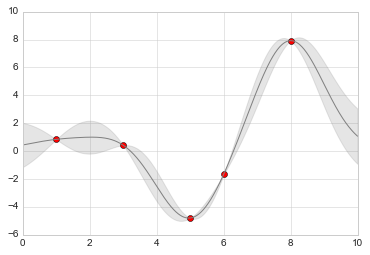

In [60]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

fill_between function인자는 x value, the lower y-bound, the upper y-bound 순으로 받음 <br>
lower bound와 upper bound 사이의 점을 채워줌 

<h2>Density and Contour Plots</h2>
3차원 시각화는 여러가지 면에서 실제로 정보를 알아보기 힘든 경우가 많음 <br>
많은 경우 3차원 데이터를 2차원에서 countor plot을 그리거나, density plot(heatmap)을 그리게 됨 <br>
plt.contour(contour plots), plt.contourf(filled contour plots), plt.imshow(이미지), plt.pcolor 등 <br>
Contour plot은 plt.contour 을 통해 그릴 수 있음 <br>

이 함수는 3개의 인자를 받음 : x좌표의 grid, y좌표의 grid, z값의 grid. <br>
x와 y는 점의 위치를 나타내 주고, z 값은 그 좌표에 해당하는 contour level을 의미 <br>
이러한 데이터를 만들기 가장 쉬운 방법은 np.meshgrid 함수

In [62]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [63]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [64]:
np.meshgrid(x, y)

[array([[0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        ...,
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.12820513, 0.12820513, 0.12820513, ..., 0.12820513, 0.12820513,
         0.12820513],
        [0.25641026, 0.25641026, 0.25641026, ..., 0.25641026, 0.25641026,
         0.25641026],
        ...,
        [4.74358974, 4.74358974, 4.74358974, ..., 4.74358974, 4.74358974,
         4.74358974],
        [4.8

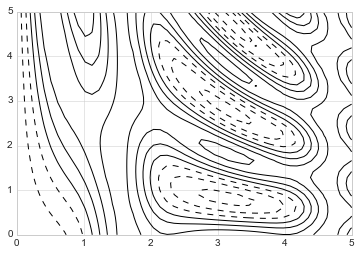

In [65]:
plt.contour(X, Y, Z, colors='black');

단색이 인자로 주어지면, 음수를 표현하기 위해서 dashed line을 쓰고 실선으로 양수를 표시함 <br>
하지만 이렇게 보면 실제로 각 선이 어느정도 레벨을 나타내는지 알기 어려워서 cmap을 통해 contour line의 색을 변경할 수 있음 <br>
또한 몇 개의 레벨로 contour를 표현할 지도 지정할 수도 있음 <br>
아래와 같이 인자를 입력하면, 20개의 균일하게 나누어진 레벨로 contour를 나누라는 뜻

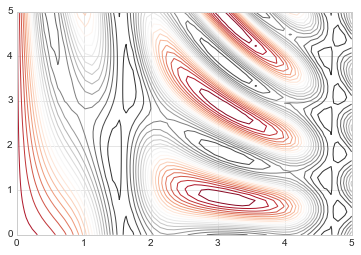

In [66]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

RdGy (Red-Gray) colormap : 중간값을 기준으로 붉은색과 흑색을 표현해주는 colormap <br> 이외에도 다양한 colormap 이 있습니다. colormap의 리스트를 보고 싶다면 아래의 커맨드를 이용해 보세요.

plt.cm.+ TAB : 다양한 colormap 리스트를 볼 수 있음 <br>
점으로만 표현하면 사실 각각의 레벨을 알기 힘든 경우도 많음 <br>
이런 경우에는 plt.contourf()을 통해서 각 contour line의 사이를 색상으로 채워주는 시각화를 해 주면 좋음 <br>

plt.colorbar() 를 추가해서 실제 각 위치의 색상 level이 어떤 숫자를 가리키는지도 알아봄

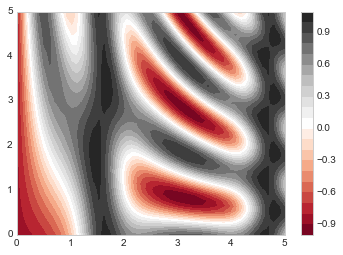

In [67]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

colorbar를 통해서 훨씬 명확하게 각 위치의 값을 알 수 있음 <br>
또 다른 문제는 contour plot의 경우 colormap이 불연속적임
contour의 레벨 수를 늘릴 수는 있지만, 이런 경우 매우 비효율적이면서 느림 <br>
대신 연속적인 colormap을 위해서 plt.imshow()을 사용

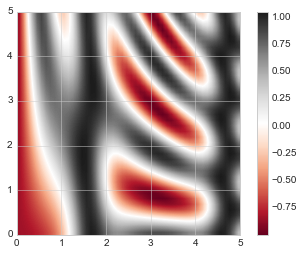

In [70]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', aspect=1)
plt.colorbar();

imshow()가 grid와 다른 점이 몇가지 있음
<br>
<li>plt.imshow() 는 x and y grid를 인자로 받지 않음 그래서 수동으로 extent[xmin, xmax, ymin, ymax]를 지정해서 범위를 정해 주어야 함
<li>plt.imshow() 는 좌측 상단의 값을 기준으로 색을 그리게 되어 있음 contour는 좌측 하단의 값을 기준으로 그림을 그림 그래서 두 가지를 매칭하려면 lower option등을 주어야 함
<li>plt.imshow() 는 axis aspect ratio를 input data에 맞추어 자동으로 조정해 줌 plt.imshow(aspect=1) 등을 넣어서 비율을 조정해줄 수 있음
<br>
contour plot과 image plot을 결합하는 것이 때로는 매우 강력한 시각화 효과를 내 줌 <br>
예를 들어서 반투명한 색상으로 heatmap을 그리고, 그 위에 contour를 그리는 것 <br>
또한 contour에 plt.clabel()을 사용해 level마다 label을 붙여서 각 level의 값도 표현

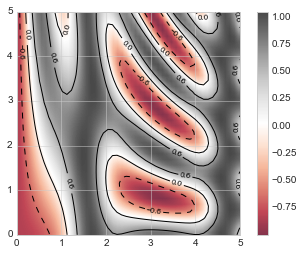

In [76]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.8)
plt.colorbar();

<h2>Histograms, Binnings, and Density</h2>
histogram은 분포 데이터를 보기 위한 가장 간편하고 좋은 방법

In [77]:
data = np.random.randn(100)

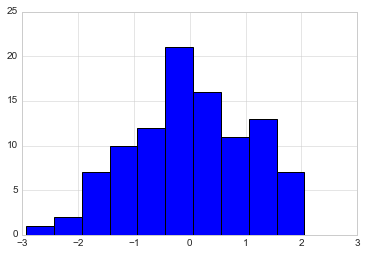

In [80]:
plt.hist(data);

hist()함수는 histogram을 계산하는 방법과 시각화 하는 방법 모두에 대해서 여러가지 함수를 제공

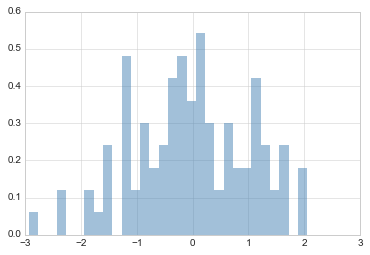

In [81]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

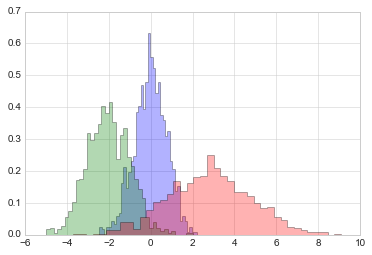

In [83]:
# histtype='stepfilled'와 alpha를 결합하면 여러 분포를 한 번에 보는 시각화에 유용함
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

np.histogram()함수를 통해 단순 계산도 가능함

In [84]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 3 17 33 27 20]


<h3>Two-Dimensional Histograms and Binnings</h3> 
2차원에서도 색상 등을 통한 hishtogram을 그릴 수 있음


In [85]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

<h3>plt.hist2d: Two-dimensional histogram</h3>
plt.hist2d 함수는 2d histogram을 그리는 가장 단순한 방법

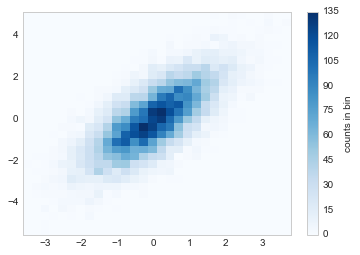

In [86]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

<h3>plt.hexbin: Hexagonal binnings</h3>
기본적으로 hist2d는 x축과 y축 사이의 사각형 그리드를 만들고, 그 안의 점 수를 세는 방식으로 그려짐 <br>
그런데 때로는 직선보다는 대각선 정보가 더 중요한 경우가 존재함 <br>
예를 들어서 y = x 의 경우, 직선 점들을 채우게 된다면 끊어진 것 처럼 보이게 됨 <br>
plt.hexbin : 육각형 grid를 사용하는 함수

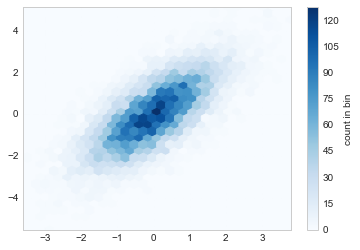

In [88]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

<h3>Kernel density estimation</h3>
kernel density estimation (KDE) : 커널 함수를 통해서 매끈하게 다듬어준 분포의 그림을 그리게 해 주는 방법 

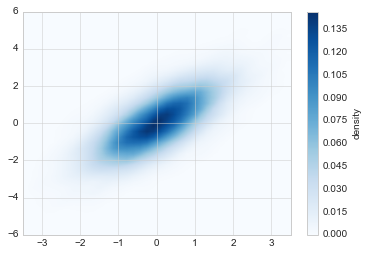

In [89]:
from scipy.stats import gaussian_kde
# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)
# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto',  extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")